In [149]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import heatmap as h_map

In [150]:
def dataSet_2():
    X_train = np.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
    Y_train = np.sin(X_train)
    X_test = np.arange(-5, 5, 0.2).reshape(-1, 1)

    return X_train,Y_train,X_test

In [151]:
def plot_gp(mu, cov, X, X_train=None, Y_train=None, samples=[]):

    X = X.ravel()
    mu = mu.ravel()
    uncertainty = 1.96 * np.sqrt(np.diag(cov))

    plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1)
    plt.plot(X, mu, label='Mean')
    plt.plot(X, mu + uncertainty, color='grey')
    plt.plot(X, mu - uncertainty, color='grey')

    
    for i, sample in enumerate(samples):
        plt.plot(X, sample, lw=1, ls='--', label=f'Sample {i+1}')
    
    if X_train is not None:
        plt.plot(X_train, Y_train, 'ro')

    plt.legend()

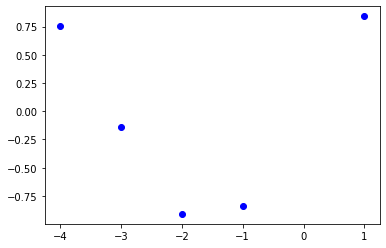

In [152]:
X_train, Y_train, X_test = dataSet_2()

plt.plot(X_train,Y_train,'bo');

In [153]:
def kernel(X1, X2, scale=1.0, sigma_f=1.0):
    sqdist = np.sum(X1**2, 1).reshape(-1,1) + np.sum(X2**2, 1) -2 *np.dot(X1, X2.T)

    return sigma_f**2 * np.exp(-0.5 / scale**2 * sqdist)

In [154]:
beta = 25

C = kernel(X_train, X_train)
k = kernel(X_train, X_test)
c = kernel(X_test, X_test)

In [155]:
C = C + np.eye(C.shape[0]) * (1/beta)
L = np.linalg.cholesky(C)
alpha = np.dot(np.linalg.inv(L.T), np.dot(np.linalg.inv(L),Y_train))
f = np.dot(k.T, alpha)
v = np.dot(np.linalg.inv(L),k)
var = c - np.dot(v.T, v)

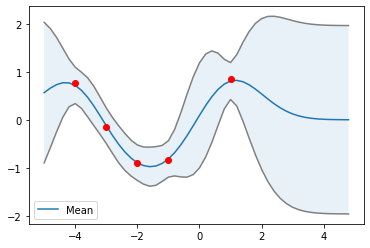

In [156]:
plot_gp(f,var, X_test, X_train=X_train, Y_train=Y_train)

In [165]:
def plot_gp(mu, cov, X, X_train=None, Y_train=None, samples=[]):

    X = X.ravel()
    mu = mu.ravel()
    uncertainty = 1.96 * np.sqrt(np.diag(cov))

    plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1)
    plt.plot(X, mu, label='Mean')
    plt.plot(X, mu + uncertainty, color='grey')
    plt.plot(X, mu - uncertainty, color='grey')
    
    nsteps = 100
    x = np.linspace(-5, 5, nsteps)  
    sigma = 1 / np.sqrt(25)
    E = np.zeros_like(x)
    K = np.exp(-(x[:, np.newaxis] - x[np.newaxis, :])**2 / (2 * sigma ))
    plt.plot(x, np.sin(x) * np.random.randn())
    
    for i, sample in enumerate(samples):
        plt.plot(X, sample, lw=1, ls='--', label=f'Sample {i+1}')
    
    if X_train is not None:
        plt.plot(X_train, Y_train, 'ro')

    plt.legend()

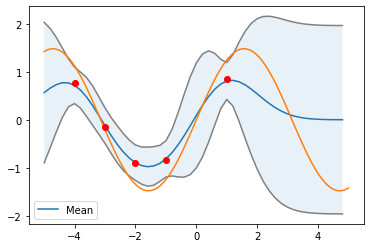

In [166]:
plot_gp(f,var, X_test, X_train=X_train, Y_train=Y_train)

<AxesSubplot:>

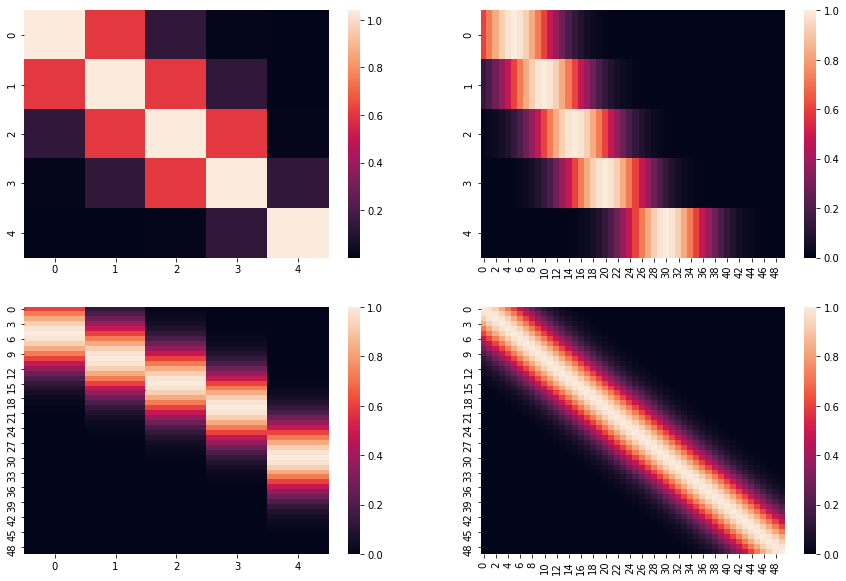

In [159]:
fig, axes = plt.subplots(2, 2, figsize=(15 , 10))

axes = axes.ravel()

h_map(C, ax=axes[0])
h_map(k, ax=axes[1])
h_map(k.T, ax=axes[2])
h_map(c, ax=axes[3])

<AxesSubplot:>

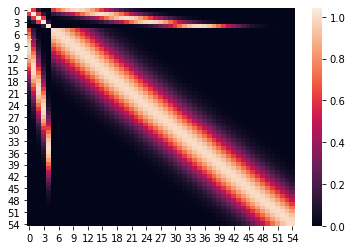

In [160]:
C_n_plus_1 = np.vstack((np.hstack((C, k)), np.hstack((k.T, c))))
h_map(C_n_plus_1)